In [1]:
import pandas as pd
import numpy as np

data_original = pd.read_csv("germancredit_reduced.csv")
data_original.head()

,Default,checkingstatus,duration,history,amount,savings,employ,installment,others,residence,property,age,cards,job,liable,tele,foreign
0,0,1,6,4,1169,0,5,4,1,4,1,67,2,3,1,1,1
1,1,2,48,2,5951,1,3,2,1,2,1,22,1,3,1,0,1
2,0,0,12,4,2096,1,4,2,1,3,1,49,1,2,2,0,1
3,0,1,42,2,7882,1,4,2,3,4,2,45,1,3,2,0,1
4,1,1,24,3,4870,1,3,3,1,4,4,53,2,3,2,0,1


In [2]:
import statsmodels.api as sm
data_original = sm.add_constant(data_original)
data_exog = data_original.drop(columns=['Default'])
bi_model = sm.formula.GLM(data_original.iloc[:,1:2],data_exog,family=sm.families.Binomial())
bi_result = bi_model.fit()
print(bi_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Default   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -527.50
Date:                Thu, 17 Jan 2019   Deviance:                       1055.0
Time:                        23:37:49   Pearson chi2:                     995.
No. Iterations:                     5   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.3879      0.836     -2.857      0.004      -4.026      -0.750
checkingstatus     0.4195      0.081    

In [3]:
selected = []
dict1 = dict(bi_result.pvalues)
for key, value in dict1.items():
    if value < 0.05:
        selected.append(key)
selected.append('Default')
data1 = data_original.loc[:,selected]
data1.head()

,const,checkingstatus,duration,history,amount,employ,installment,property,cards,tele,Default
0,1.0,1,6,4,1169,5,4,1,2,1,0
1,1.0,2,48,2,5951,3,2,1,1,0,1
2,1.0,0,12,4,2096,4,2,1,1,0,0
3,1.0,1,42,2,7882,4,2,2,1,0,0
4,1.0,1,24,3,4870,3,3,4,2,0,1


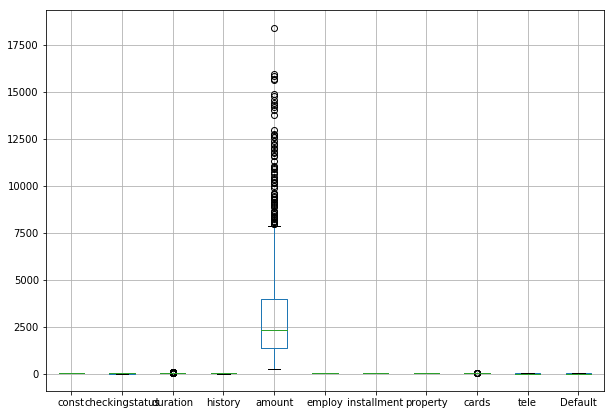

In [4]:
bxp = data1.boxplot(figsize=(10,7))

In [5]:
bi_model2 = sm.formula.GLM(data1.iloc[:,-1],data1.iloc[:,:-1],family=sm.families.Binomial())
bi_result2 = bi_model2.fit()
print(bi_result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Default   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      990
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -532.11
Date:                Thu, 17 Jan 2019   Deviance:                       1064.2
Time:                        23:37:50   Pearson chi2:                     995.
No. Iterations:                     5   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7231      0.414     -4.166      0.000      -2.534      -0.912
checkingstatus     0.4063      0.080    

### Find the Correlation

In [6]:
data1 = data1.drop(columns=['const'])
print(data1.corr().iloc[-1])

checkingstatus    0.197788
duration          0.214927
history          -0.228785
amount            0.154739
employ           -0.116002
installment       0.072404
property          0.142612
cards            -0.045732
tele             -0.036466
Default           1.000000
Name: Default, dtype: float64


In [7]:
data_orginal = data_original.drop(columns=['const'])
print(data_original.corr().iloc[1])

const                  NaN
Default           1.000000
checkingstatus    0.197788
duration          0.214927
history          -0.228785
amount            0.154739
savings          -0.033871
employ           -0.116002
installment       0.072404
others           -0.025137
residence         0.002967
property          0.142612
age              -0.091127
cards            -0.045732
job               0.032735
liable           -0.003015
tele             -0.036466
foreign           0.082079
Name: Default, dtype: float64


### K-means Clustering

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0, n_init=100)
cluster = km.fit_predict(data1.iloc[:,:-1])

from sklearn.metrics import confusion_matrix
print("FP|TN")
print("TP|FN")
print(confusion_matrix(data1.iloc[:,-1].values, cluster))

FP|TN
TP|FN
[[101 599]
 [ 72 228]]


### Hierarchical Clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
cluster = hier.fit_predict(data1.iloc[:,:-1])  

print("FP|TN")
print("TP|FN")
print(confusion_matrix(data1.iloc[:,-1].values, cluster))

FP|TN
TP|FN
[[ 25 675]
 [ 31 269]]
